In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/07_Jul.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,27.000000,88.000000,1,7,0,2778.0,2758.0,2777.0,2320.0,2364.0,2761.0,2777.166667,2830.0
1,27.000000,88.333333,1,7,0,2765.0,2759.0,2761.0,2326.0,2340.0,2731.0,2780.500000,2801.0
2,27.000000,88.666667,1,7,0,2794.0,2748.0,2787.0,2322.0,2347.0,2709.0,2782.416667,2810.0
3,27.000000,89.000000,1,7,0,2815.0,2769.0,2762.0,2293.0,2342.0,2695.0,2783.500000,2775.0
4,27.000000,89.333333,2,7,0,2830.0,2778.0,2758.0,2280.0,2326.0,2723.0,2783.833333,2762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,30.182451,81.141470,23,3,1,3767.0,3695.0,3605.0,3638.0,3110.0,3235.0,3709.500000,3804.0
8828,30.182451,81.141470,24,3,1,3767.0,3669.0,3626.0,3658.0,3123.0,3225.0,3720.500000,3758.0
8829,30.182451,81.141470,24,3,1,3760.0,3690.0,3608.0,3653.0,3115.0,3253.0,3728.416667,3703.0
8830,30.272451,81.141470,24,3,1,3789.0,3713.0,3626.0,3633.0,3178.0,3257.0,3741.000000,3777.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   int64  
 3   B       8832 non-null   int64  
 4   C       8832 non-null   int64  
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 897.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8832 non-null   float64
 1   Hum     8832 non-null   float64
 2   A       8832 non-null   float64
 3   B       8832 non-null   float64
 4   C       8832 non-null   float64
 5   D       8832 non-null   float64
 6   E       8832 non-null   float64
 7   F       8832 non-null   float64
 8   G       8832 non-null   float64
 9   H       8832 non-null   float64
 10  I       8832 non-null   float64
 11  J       8832 non-null   float64
 12  Cons    8832 non-null   float64
dtypes: float64(13)
memory usage: 897.1 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.284665,-1.348421,1.239100,-1.660902,1.53858,-1.400692,-1.416140,-1.464973,-1.414460,-2.462885,-2.214015,-1.201190,-1.475443
1,-1.358968,-1.348421,1.264151,-1.660902,1.53858,-1.400692,-1.449429,-1.462414,-1.455387,-2.448042,-2.270603,-1.269101,-1.466560
2,-1.335908,-1.348421,1.289203,-1.660902,1.53858,-1.400692,-1.375169,-1.490562,-1.388881,-2.457938,-2.254098,-1.318901,-1.461452
3,-1.425584,-1.348421,1.314255,-1.660902,1.53858,-1.400692,-1.321394,-1.436825,-1.452829,-2.529678,-2.265887,-1.350593,-1.458565
4,-1.458892,-1.348421,1.339307,-1.516457,1.53858,-1.400692,-1.282983,-1.413795,-1.463061,-2.561837,-2.303612,-1.287210,-1.457676


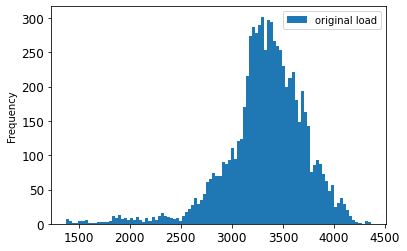

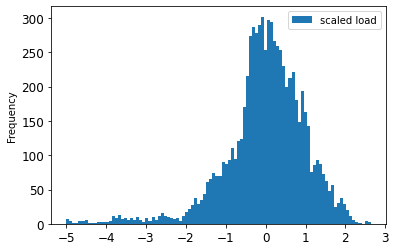

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

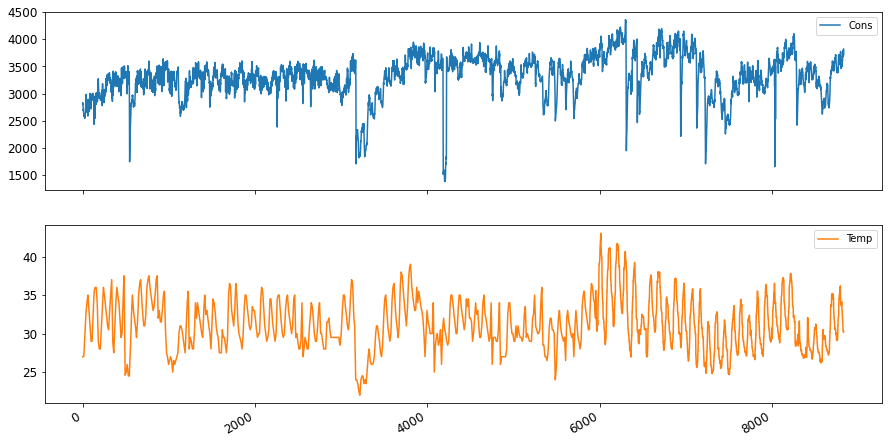

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.284665,-1.348421,1.239100,-1.660902,1.53858,-1.400692,-1.416140,-1.464973,-1.414460,-2.462885,-2.214015,-1.201190,-1.475443,-1.054072
1,-1.358968,-1.348421,1.264151,-1.660902,1.53858,-1.400692,-1.449429,-1.462414,-1.455387,-2.448042,-2.270603,-1.269101,-1.466560,-1.123250
2,-1.335908,-1.348421,1.289203,-1.660902,1.53858,-1.400692,-1.375169,-1.490562,-1.388881,-2.457938,-2.254098,-1.318901,-1.461452,-1.136061
3,-1.425584,-1.348421,1.314255,-1.660902,1.53858,-1.400692,-1.321394,-1.436825,-1.452829,-2.529678,-2.265887,-1.350593,-1.458565,-1.059196
4,-1.458892,-1.348421,1.339307,-1.516457,1.53858,-1.400692,-1.282983,-1.413795,-1.463061,-2.561837,-2.303612,-1.287210,-1.457676,-1.082256
5,-1.487075,-1.348421,1.364358,-1.516457,1.53858,-1.400692,-1.357244,-1.447061,-1.460503,-2.571732,-2.381421,-1.427558,-1.459453,-1.169369
6,-1.645929,-1.348421,1.389410,-1.516457,1.53858,-1.400692,-1.334197,-1.372853,-1.488640,-2.603891,-2.334264,-1.463777,-1.472556,-0.905467
7,-1.594686,-1.348421,1.414462,-1.516457,1.53858,-1.400692,-1.423822,-1.319116,-1.434923,-2.591522,-2.341338,-1.543005,-1.485881,-0.931089
8,-1.648491,-1.348421,1.439513,-1.372011,1.53858,-1.400692,-1.457111,-1.280733,-1.411902,-2.643472,-2.336622,-1.678826,-1.505868,-0.943899
9,-1.661301,-1.348421,1.464565,-1.372011,1.53858,-1.400692,-1.485279,-1.354941,-1.445155,-2.668210,-2.386137,-1.954994,-1.524079,-1.048948


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.284665,-1.348421,1.239100,-1.660902,1.53858,-1.400692,-1.416140,-1.464973,-1.414460,-2.462885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665
1,-1.358968,-1.348421,1.264151,-1.660902,1.53858,-1.400692,-1.449429,-1.462414,-1.455387,-2.448042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968
2,-1.335908,-1.348421,1.289203,-1.660902,1.53858,-1.400692,-1.375169,-1.490562,-1.388881,-2.457938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908
3,-1.425584,-1.348421,1.314255,-1.660902,1.53858,-1.400692,-1.321394,-1.436825,-1.452829,-2.529678,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584
4,-1.458892,-1.348421,1.339307,-1.516457,1.53858,-1.400692,-1.282983,-1.413795,-1.463061,-2.561837,...,NaN,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892
5,-1.487075,-1.348421,1.364358,-1.516457,1.53858,-1.400692,-1.357244,-1.447061,-1.460503,-2.571732,...,NaN,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075
6,-1.645929,-1.348421,1.389410,-1.516457,1.53858,-1.400692,-1.334197,-1.372853,-1.488640,-2.603891,...,NaN,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929
7,-1.594686,-1.348421,1.414462,-1.516457,1.53858,-1.400692,-1.423822,-1.319116,-1.434923,-2.591522,...,NaN,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929,-1.594686
8,-1.648491,-1.348421,1.439513,-1.372011,1.53858,-1.400692,-1.457111,-1.280733,-1.411902,-2.643472,...,NaN,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929,-1.594686,-1.648491
9,-1.661301,-1.348421,1.464565,-1.372011,1.53858,-1.400692,-1.485279,-1.354941,-1.445155,-2.668210,...,-1.284665,-1.358968,-1.335908,-1.425584,-1.458892,-1.487075,-1.645929,-1.594686,-1.648491,-1.661301


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7383,-0.180379,-1.319875,1.314540,1.372460,-0.919225,0.713933,-0.481483,-0.246942,-0.265948,-0.845025,...,-0.206000,-0.249557,-0.413534,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379
7384,-0.203438,-1.319875,1.314540,1.516906,-0.919225,0.713933,-0.412344,-0.410710,-0.521741,-0.798023,...,-0.249557,-0.413534,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438
7385,-0.170130,-1.319875,1.314540,1.516906,-0.919225,0.713933,-0.345766,-0.438858,-0.498720,-0.807918,...,-0.413534,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130
7386,-0.193189,-1.375453,1.333631,1.516906,-0.919225,0.713933,-0.161395,-0.418387,-0.202000,-1.003348,...,-0.441718,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189
7387,-0.234184,-1.431032,1.352723,1.516906,-0.919225,0.713933,-0.179320,-0.479800,-0.245485,-0.847499,...,-0.421221,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184
7388,-0.300800,-1.431032,1.352723,1.661352,-0.919225,0.713933,-0.202366,-0.410710,-0.409192,-0.887080,...,-0.482712,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800
7389,-0.270054,-1.431032,1.352723,1.661352,-0.919225,0.713933,-0.169077,-0.344179,-0.437330,-0.832656,...,-0.413534,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054
7390,-0.203438,-1.495873,1.352723,1.661352,-0.919225,0.713933,-0.192123,-0.159939,-0.416866,-0.642174,...,-0.346918,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054,-0.203438
7391,-0.267492,-1.495873,1.379874,1.661352,-0.919225,0.713933,-0.233095,-0.177851,-0.478256,-0.600120,...,-0.162444,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054,-0.203438,-0.267492
7392,-0.298238,-1.495873,1.379874,-1.660902,-0.427664,0.713933,-0.299673,-0.200881,-0.409192,-0.600120,...,-0.180379,-0.203438,-0.170130,-0.193189,-0.234184,-0.300800,-0.270054,-0.203438,-0.267492,-0.298238


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7283,-1.115563,-1.196368,1.253306,1.228014,-1.410786,-1.400692,-1.221526,-1.311440,-1.081929,0.451242,...,-1.205239,-1.315411,-1.425584,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563
7284,-1.089942,-1.196368,1.253306,1.372460,-1.410786,-1.400692,-1.239451,-1.421472,-1.138203,0.461137,...,-1.315411,-1.425584,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942
7285,-1.031013,-1.196368,1.253306,1.372460,-1.410786,-1.400692,-1.234330,-1.390765,-1.199594,0.493296,...,-1.425584,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013
7286,-0.938775,-1.420225,1.516603,1.372460,-1.410786,-1.400692,-1.149827,-1.234673,-1.199594,0.641724,...,-1.394838,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775
7287,-0.915716,-1.644081,1.779900,1.372460,-1.410786,-1.400692,-1.113977,-1.219320,-1.309585,0.812416,...,-1.238547,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716
7288,-0.867035,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.088370,-1.237232,-1.419576,0.770361,...,-1.223174,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035
7289,-0.877283,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.029474,-1.232114,-1.388881,0.762940,...,-1.241109,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283
7290,-1.079693,-1.679590,1.775440,1.516906,-1.410786,-1.400692,-0.937288,-1.147671,-1.232847,0.760466,...,-1.235985,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283,-1.079693
7291,-0.918278,-1.715099,1.770980,1.516906,-1.410786,-1.400692,-0.914242,-1.111846,-1.217499,0.795099,...,-1.151434,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283,-1.079693,-0.918278
7292,-0.959272,-1.715099,1.770980,1.661352,-1.410786,-1.400692,-0.865588,-1.086257,-1.235405,0.881682,...,-1.115563,-1.089942,-1.031013,-0.938775,-0.915716,-0.867035,-0.877283,-1.079693,-0.918278,-0.959272


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.990018
11,-0.946462
12,-0.972083
13,-0.974645
14,-0.984894
...,...
7288,-0.300800
7289,-0.270054
7290,-0.203438
7291,-0.267492


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-1.704858,-1.348421,1.489617,-1.372011,1.538580,-1.400692,-1.644043,-1.331911,-1.370975,-2.665736,-2.480450,-1.977631,-1.552505
11,-1.763788,-1.348421,1.514669,-1.372011,1.538580,-1.400692,-1.592828,-1.421472,-1.317259,-2.685527,-2.397926,-2.072705,-1.590704
12,-1.779160,-1.348421,1.539720,-1.227565,1.538580,-1.400692,-1.646603,-1.454737,-1.278890,-2.769635,-2.459230,-2.063651,-1.633565
13,-1.894457,-1.284094,1.458302,-1.227565,1.538580,-1.400692,-1.659407,-1.482885,-1.353070,-2.799321,-2.506386,-1.993477,-1.679981
14,-1.866274,-1.219767,1.376884,-1.227565,1.538580,-1.400692,-1.702939,-1.641536,-1.330048,-2.868587,-2.492239,-1.950467,-1.725952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,-0.867035,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.088370,-1.237232,-1.419576,0.770361,1.440632,1.211887,-1.163640
7289,-0.877283,-1.644081,1.779900,1.516906,-1.410786,-1.400692,-1.029474,-1.232114,-1.388881,0.762940,1.409980,1.134922,-1.118779
7290,-1.079693,-1.679590,1.775440,1.516906,-1.410786,-1.400692,-0.937288,-1.147671,-1.232847,0.760466,1.421770,1.306962,-1.105010
7291,-0.918278,-1.715099,1.770980,1.516906,-1.410786,-1.400692,-0.914242,-1.111846,-1.217499,0.795099,1.384044,1.295643,-1.078582


In [18]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3185.0,26.522451,89.873120,1.0,3.0,1.0,3226.0,3265.0,3196.0,3069.0,3728.0,3988.0,3238.416667
7394,3194.0,26.327451,90.455945,1.0,3.0,1.0,3252.0,3256.0,3268.0,3066.0,3736.0,3968.0,3232.250000
7395,3166.0,26.132450,91.038770,1.0,3.0,1.0,3227.0,3240.0,3261.0,3019.0,3729.0,3933.0,3224.333333
7396,3133.0,26.132450,91.038770,2.0,3.0,1.0,3215.0,3214.0,3252.0,3019.0,3659.0,3897.0,3214.416667
7397,3097.0,26.132450,91.038770,2.0,3.0,1.0,3185.0,3226.0,3265.0,2982.0,3590.0,3914.0,3200.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3387.0,27.322450,91.371080,24.0,5.0,1.0,3411.0,3304.0,3218.0,4019.0,3970.0,3825.0,3358.750000
8350,3453.0,27.362452,91.371080,24.0,5.0,1.0,3415.0,3379.0,3207.0,4100.0,3999.0,3833.0,3379.250000
8351,3467.0,27.362452,90.833920,24.0,5.0,1.0,3433.0,3407.0,3270.0,4062.0,3995.0,3827.0,3395.666667
8352,3468.0,27.362452,90.833920,1.0,6.0,1.0,3419.0,3420.0,3253.0,4070.0,3968.0,3851.0,3413.583333


In [19]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,1.491855,2.279097,-0.137011
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,1.513297,2.224740,-0.153955
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,1.494535,2.129614,-0.175707
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,1.306916,2.031771,-0.202954
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,1.121977,2.077975,-0.241421
7398,-0.462389,-1.412305,1.335665,-1.513750,-0.579955,0.499675,-0.249148,-0.094378,-0.082086,-0.881215,1.100535,2.020899,-0.273935
7399,-0.554640,-1.361759,1.282998,-1.513750,-0.579955,0.499675,-0.322974,-0.160307,-0.124288,-0.905354,1.033528,1.999156,-0.310799
7400,-0.799762,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.409983,-0.191953,-0.192865,-0.918765,0.915596,1.931210,-0.363004
7401,-0.638983,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.504902,-0.271068,-0.161214,-0.961679,0.829827,1.833366,-0.403989
7402,-0.673247,-1.518291,1.324769,-1.369419,-0.579955,0.499675,-0.460079,-0.247334,-0.092637,-1.012641,0.845909,1.814341,-0.453904


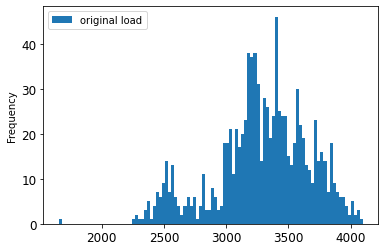

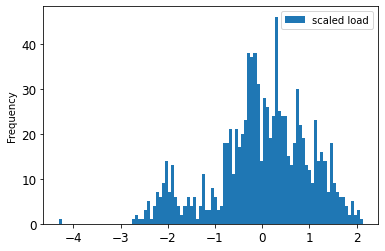

In [20]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [21]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,1.491855,2.279097,-0.137011,-2.038550
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,1.513297,2.224740,-0.153955,-1.999014
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,1.494535,2.129614,-0.175707,-1.999014
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,1.306916,2.031771,-0.202954,-2.028007
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,1.121977,2.077975,-0.241421,-2.059636
7398,-0.462389,-1.412305,1.335665,-1.513750,-0.579955,0.499675,-0.249148,-0.094378,-0.082086,-0.881215,1.100535,2.020899,-0.273935,-2.064907
7399,-0.554640,-1.361759,1.282998,-1.513750,-0.579955,0.499675,-0.322974,-0.160307,-0.124288,-0.905354,1.033528,1.999156,-0.310799,-2.117622
7400,-0.799762,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.409983,-0.191953,-0.192865,-0.918765,0.915596,1.931210,-0.363004,-2.178243
7401,-0.638983,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.504902,-0.271068,-0.161214,-0.961679,0.829827,1.833366,-0.403989,-2.199329
7402,-0.673247,-1.518291,1.324769,-1.369419,-0.579955,0.499675,-0.460079,-0.247334,-0.092637,-1.012641,0.845909,1.814341,-0.453904,-2.244136


In [22]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,1.491855,2.279097,-0.137011,-2.038550
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,1.513297,2.224740,-0.153955,-1.999014
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,1.494535,2.129614,-0.175707,-1.999014
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,1.306916,2.031771,-0.202954,-2.028007
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,1.121977,2.077975,-0.241421,-2.059636
7398,-0.462389,-1.412305,1.335665,-1.513750,-0.579955,0.499675,-0.249148,-0.094378,-0.082086,-0.881215,1.100535,2.020899,-0.273935,-2.064907
7399,-0.554640,-1.361759,1.282998,-1.513750,-0.579955,0.499675,-0.322974,-0.160307,-0.124288,-0.905354,1.033528,1.999156,-0.310799,-2.117622
7400,-0.799762,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.409983,-0.191953,-0.192865,-0.918765,0.915596,1.931210,-0.363004,-2.178243
7401,-0.638983,-1.361759,1.282998,-1.369419,-0.579955,0.499675,-0.504902,-0.271068,-0.161214,-0.961679,0.829827,1.833366,-0.403989,-2.199329
7402,-0.673247,-1.518291,1.324769,-1.369419,-0.579955,0.499675,-0.460079,-0.247334,-0.092637,-1.012641,0.845909,1.814341,-0.453904,-2.244136


In [23]:
valid_shifted = valid_shifted.dropna(how='any')

In [24]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8244,1.690994,0.907953,-0.455956,1.372873,-0.003002,0.499675,1.454124,1.226841,1.218246,1.605150,1.282793,0.460840,1.470125,0.344141
8245,1.630373,0.907953,-0.455956,1.372873,-0.003002,0.499675,1.422484,1.182009,1.152306,1.653429,1.467732,0.724473,1.512255,0.320420
8246,2.007281,0.699243,-0.308521,1.372873,-0.003002,0.499675,1.585956,1.440451,1.344850,1.782173,1.577623,0.819599,1.570414,0.330963
8247,2.025731,0.490534,-0.161087,1.372873,-0.003002,0.499675,1.701968,1.458911,1.278911,1.787537,1.577623,0.784267,1.635899,0.378406
8248,1.909759,0.490534,-0.161087,1.517204,-0.003002,0.499675,1.694058,1.456274,1.228796,1.704390,1.572263,0.890264,1.695660,0.341505
8249,1.883402,0.490534,-0.161087,1.517204,-0.003002,0.499675,1.633415,1.424628,1.183957,1.522003,1.491855,0.887546,1.757024,0.257162
8250,1.725259,0.528037,-0.168733,1.517204,-0.003002,0.499675,2.010455,1.588132,1.442441,1.602468,1.553501,1.012568,1.782210,0.431120
8251,1.646187,0.565539,-0.176378,1.517204,-0.003002,0.499675,2.028912,1.704168,1.460904,1.674886,1.647311,1.056054,1.798925,0.468020
8252,1.659366,0.565539,-0.176378,1.661535,-0.003002,0.499675,1.912900,1.696256,1.458267,1.763398,1.644630,1.137590,1.817014,0.470656
8253,1.922938,0.565539,-0.176378,1.661535,-0.003002,0.499675,1.886533,1.635601,1.426616,1.884095,1.751841,1.289791,1.860747,0.378406


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7393,-2.038550
7394,-1.999014
7395,-1.999014
7396,-2.028007
7397,-2.059636
...,...
8249,0.257162
8250,0.431120
8251,0.468020
8252,0.470656


In [26]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-0.275253,-1.335670,1.288033,-1.658081,-0.579955,0.499675,-0.164775,-0.060095,-0.240342,-0.532533,1.491855,2.279097,-0.137011
7394,-0.251532,-1.399261,1.338182,-1.658081,-0.579955,0.499675,-0.096222,-0.083829,-0.050435,-0.540580,1.513297,2.224740,-0.153955
7395,-0.325332,-1.462852,1.388331,-1.658081,-0.579955,0.499675,-0.162138,-0.126024,-0.068898,-0.666642,1.494535,2.129614,-0.175707
7396,-0.412311,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.193778,-0.194590,-0.092637,-0.666642,1.306916,2.031771,-0.202954
7397,-0.507197,-1.462852,1.388331,-1.513750,-0.579955,0.499675,-0.272877,-0.162944,-0.058348,-0.765882,1.121977,2.077975,-0.241421
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,1.883402,0.490534,-0.161087,1.517204,-0.003002,0.499675,1.633415,1.424628,1.183957,1.522003,1.491855,0.887546,1.757024
8250,1.725259,0.528037,-0.168733,1.517204,-0.003002,0.499675,2.010455,1.588132,1.442441,1.602468,1.553501,1.012568,1.782210
8251,1.646187,0.565539,-0.176378,1.517204,-0.003002,0.499675,2.028912,1.704168,1.460904,1.674886,1.647311,1.056054,1.798925
8252,1.659366,0.565539,-0.176378,1.661535,-0.003002,0.499675,1.912900,1.696256,1.458267,1.763398,1.644630,1.137590,1.817014


In [27]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [28]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,103
Trainable params: 2,103
Non-trainable params: 0
_________________________________________________________________


In [29]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [30]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=150,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
49/49 [==============================] - 0s 5ms/step - loss: 1.2442 - val_loss: 0.8635
Epoch 2/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2388 - val_loss: 0.8599
Epoch 3/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2335 - val_loss: 0.8564
Epoch 4/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2283 - val_loss: 0.8529
Epoch 5/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2232 - val_loss: 0.8496
Epoch 6/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2181 - val_loss: 0.8462
Epoch 7/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2131 - val_loss: 0.8430
Epoch 8/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2082 - val_loss: 0.8398
Epoch 9/300
49/49 [==============================] - 0s 2ms/step - loss: 1.2034 - val_loss: 0.8367
Epoch 10/300
49/49 [==============================] - 0s 2ms/step - loss: 1.1986 - val_loss: 0.8337
Epoch 11/

Epoch 83/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0214 - val_loss: 0.7447
Epoch 84/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0205 - val_loss: 0.7445
Epoch 85/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0196 - val_loss: 0.7443
Epoch 86/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0187 - val_loss: 0.7442
Epoch 87/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0178 - val_loss: 0.7440
Epoch 88/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0169 - val_loss: 0.7438
Epoch 89/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0161 - val_loss: 0.7437
Epoch 90/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0153 - val_loss: 0.7435
Epoch 91/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0145 - val_loss: 0.7434
Epoch 92/300
49/49 [==============================] - 0s 2ms/step - loss: 1.0137 - val_loss: 0.7433


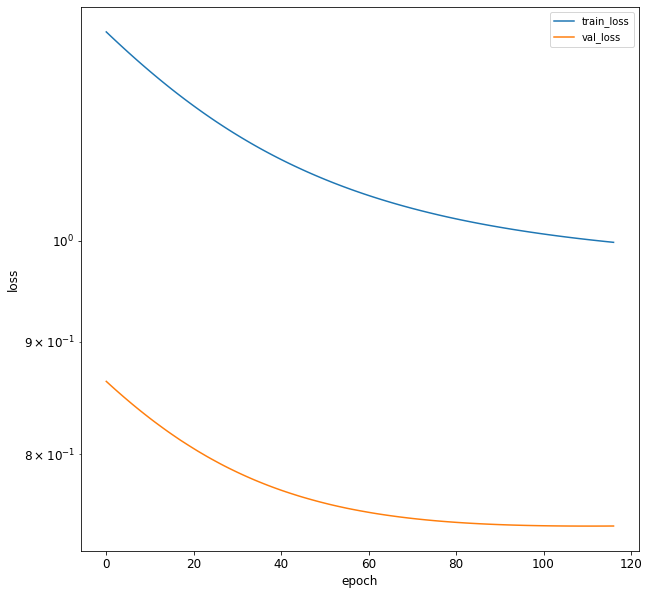

In [31]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [32]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index<= 8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,3434.0,27.247451,91.724085,1.0,6.0,1.0,3453.0,3415.0,3379.0,4025.0,3954.0,3798.0,3428.916667
8355,3389.0,27.132450,92.614250,1.0,6.0,1.0,3467.0,3433.0,3407.0,4023.0,3929.0,3754.0,3427.416667
8356,3392.0,27.132450,92.614250,2.0,6.0,1.0,3468.0,3419.0,3420.0,3960.0,3867.0,3715.0,3425.083333
8357,3360.0,27.132450,92.614250,2.0,6.0,1.0,3433.0,3387.0,3411.0,3881.0,3842.0,3678.0,3420.833333
8358,3323.0,27.127451,92.368057,2.0,6.0,1.0,3434.0,3453.0,3415.0,3814.0,3852.0,3712.0,3413.166667
8359,3329.0,27.122452,92.121864,2.0,6.0,1.0,3389.0,3467.0,3433.0,3760.0,3849.0,3688.0,3404.500000
8360,3301.0,27.122452,92.121864,3.0,6.0,1.0,3392.0,3468.0,3419.0,3722.0,3832.0,3665.0,3394.666667
8361,3265.0,27.122452,92.121864,3.0,6.0,1.0,3360.0,3433.0,3387.0,3654.0,3799.0,3376.0,3384.500000
8362,3245.0,26.957452,92.498527,3.0,6.0,1.0,3323.0,3434.0,3453.0,3633.0,3795.0,3618.0,3367.166667
8363,3250.0,26.792452,92.875190,3.0,6.0,1.0,3329.0,3389.0,3467.0,3653.0,3773.0,3566.0,3349.083333


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


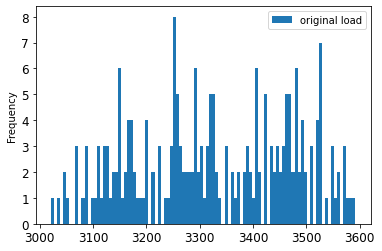

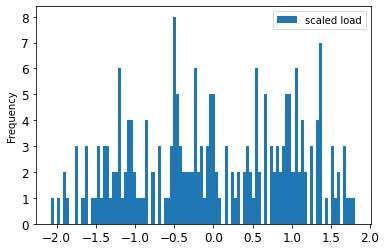

In [34]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [35]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.738066,-0.689761,0.809018,-1.498364,0.037858,1.12041,0.834739,0.544808,0.263776,2.612007,1.186843,0.423200,0.723413,1.023781
8355,0.431942,-0.768607,0.942258,-1.498364,0.037858,1.12041,0.931200,0.670815,0.462427,2.604448,1.117000,0.116089,0.712030,0.846910
8356,0.452350,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.938090,0.572810,0.554658,2.366356,0.943790,-0.156124,0.694323,0.649630
8357,0.234663,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.696938,0.348797,0.490806,2.067797,0.873947,-0.414377,0.662071,0.581603
8358,-0.017039,-0.772034,0.905408,-1.357685,0.037858,1.12041,0.703828,0.810823,0.519185,1.814587,0.901884,-0.177063,0.603891,0.520378
8359,0.023778,-0.775461,0.868558,-1.357685,0.037858,1.12041,0.393774,0.908828,0.646889,1.610509,0.893503,-0.344579,0.538123,0.397928
8360,-0.166699,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.414445,0.915828,0.547564,1.466897,0.846009,-0.505114,0.463501,0.180241
8361,-0.411598,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.193962,0.670815,0.320533,1.209909,0.753817,-2.522278,0.386349,0.016975
8362,-0.547653,-0.888586,0.924937,-1.217006,0.037858,1.12041,-0.060971,0.677815,0.788783,1.130545,0.742642,-0.833165,0.254812,-0.030644
8363,-0.513639,-1.001711,0.981316,-1.217006,0.037858,1.12041,-0.019630,0.362798,0.888109,1.206130,0.681180,-1.196115,0.117583,-0.057855


In [36]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,0.738066,-0.689761,0.809018,-1.498364,0.037858,1.12041,0.834739,0.544808,0.263776,2.612007,1.186843,0.423200,0.723413,1.023781
8355,0.431942,-0.768607,0.942258,-1.498364,0.037858,1.12041,0.931200,0.670815,0.462427,2.604448,1.117000,0.116089,0.712030,0.846910
8356,0.452350,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.938090,0.572810,0.554658,2.366356,0.943790,-0.156124,0.694323,0.649630
8357,0.234663,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.696938,0.348797,0.490806,2.067797,0.873947,-0.414377,0.662071,0.581603
8358,-0.017039,-0.772034,0.905408,-1.357685,0.037858,1.12041,0.703828,0.810823,0.519185,1.814587,0.901884,-0.177063,0.603891,0.520378
8359,0.023778,-0.775461,0.868558,-1.357685,0.037858,1.12041,0.393774,0.908828,0.646889,1.610509,0.893503,-0.344579,0.538123,0.397928
8360,-0.166699,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.414445,0.915828,0.547564,1.466897,0.846009,-0.505114,0.463501,0.180241
8361,-0.411598,-0.775461,0.868558,-1.217006,0.037858,1.12041,0.193962,0.670815,0.320533,1.209909,0.753817,-2.522278,0.386349,0.016975
8362,-0.547653,-0.888586,0.924937,-1.217006,0.037858,1.12041,-0.060971,0.677815,0.788783,1.130545,0.742642,-0.833165,0.254812,-0.030644
8363,-0.513639,-1.001711,0.981316,-1.217006,0.037858,1.12041,-0.019630,0.362798,0.888109,1.206130,0.681180,-1.196115,0.117583,-0.057855


In [37]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8461,0.016975,-0.631485,1.182727,-1.076327,0.611132,-0.89253,0.545356,1.216845,1.654337,-0.619243,0.234185,-0.337599,0.865701,-1.221125
8462,-0.030644,-0.854307,1.214762,-1.076327,0.611132,-0.89253,0.483345,0.971832,1.526632,-0.638139,0.239772,-0.218942,0.716457,-1.193914
8463,-0.057855,-1.077129,1.246797,-1.076327,0.611132,-0.89253,0.359324,0.789822,1.491159,-0.581450,0.312409,-0.023507,0.567845,-1.193914
8464,-0.520442,-1.077129,1.246797,-0.935648,0.611132,-0.89253,0.138842,0.586810,1.320886,-0.509645,0.323584,0.032331,0.391408,-1.500037
8465,-0.010236,-1.077129,1.246797,-0.935648,0.611132,-0.89253,-0.026520,0.516807,1.200276,-0.570113,0.217423,-0.965781,0.273151,-1.731330


In [38]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8354,1.023781
8355,0.846910
8356,0.649630
8357,0.581603
8358,0.520378
...,...
8461,-1.221125
8462,-1.193914
8463,-1.193914
8464,-1.500037


In [39]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,0.738066,-0.689761,0.809018,-1.498364,0.037858,1.12041,0.834739,0.544808,0.263776,2.612007,1.186843,0.423200,0.723413
8355,0.431942,-0.768607,0.942258,-1.498364,0.037858,1.12041,0.931200,0.670815,0.462427,2.604448,1.117000,0.116089,0.712030
8356,0.452350,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.938090,0.572810,0.554658,2.366356,0.943790,-0.156124,0.694323
8357,0.234663,-0.768607,0.942258,-1.357685,0.037858,1.12041,0.696938,0.348797,0.490806,2.067797,0.873947,-0.414377,0.662071
8358,-0.017039,-0.772034,0.905408,-1.357685,0.037858,1.12041,0.703828,0.810823,0.519185,1.814587,0.901884,-0.177063,0.603891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0.016975,-0.631485,1.182727,-1.076327,0.611132,-0.89253,0.545356,1.216845,1.654337,-0.619243,0.234185,-0.337599,0.865701
8462,-0.030644,-0.854307,1.214762,-1.076327,0.611132,-0.89253,0.483345,0.971832,1.526632,-0.638139,0.239772,-0.218942,0.716457
8463,-0.057855,-1.077129,1.246797,-1.076327,0.611132,-0.89253,0.359324,0.789822,1.491159,-0.581450,0.312409,-0.023507,0.567845
8464,-0.520442,-1.077129,1.246797,-0.935648,0.611132,-0.89253,0.138842,0.586810,1.320886,-0.509645,0.323584,0.032331,0.391408


In [40]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.19701147079467773s


In [41]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3325.504717
dtype: float64
Cons    147.347431
dtype: float64


In [42]:
load_mean=3325.504717
load_std=147.347431
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


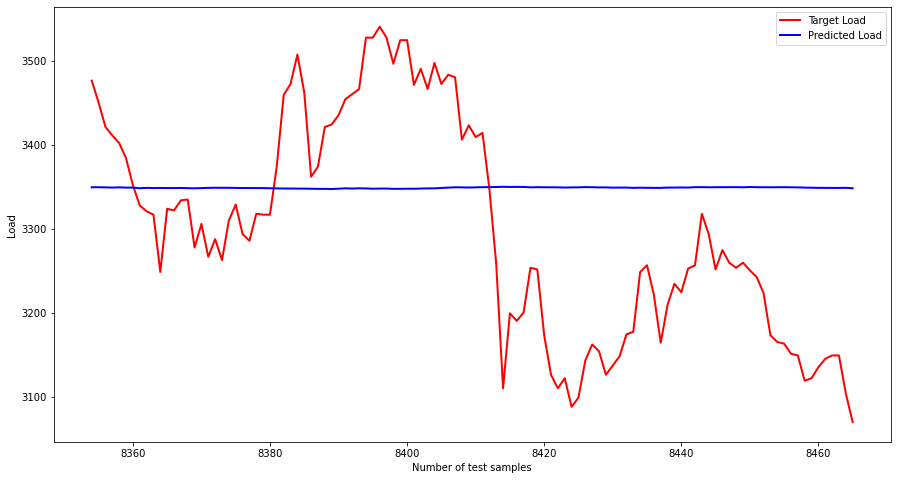

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

3.6947286685429286


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -1.634217
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8354  347539.266486
8355  344932.384580
8356  342024.701032
8357  341022.053220
8358  340119.655735
...             ...
8461  314451.051708
8462  314852.135153
8463  314852.136215
8464  310339.936422
8465  306930.709365

[112 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8354  16067.110119
8355  10137.674898
8356   5154.714045
8357   3844.298215
8358   2781.959779
...            ...
8461  41316.144410
8462  39687.571851
8463  39674.246415
8464  59739.275249
8465  77258.800809

[112 rows x 1 columns]
y_t+100    19261.116128
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    138.784423
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3349.6]
[3349.6086]
[3349.4297]
[3349.2]
[3349.4368]
[3349.1487]
[3349.169]
[3348.4065]
[3348.8203]
[3348.6458]
[3348.7112]
[3348.6304]
[3348.6384]
[3348.728]
[3348.5166]
[3348.363]
[3348.5547]
[3348.8413]
[3348.975]
[3348.9382]
[3348.9106]
[3348.7844]
[3348.6582]
[3348.644]
[3348.5942]
[3348.593]
[3348.4326]
[3348.2197]
[3348.0947]
[3348.0605]
[3347.9617]
[3347.9285]
[3347.809]
[3347.618]
[3347.6638]
[3347.4812]
[3347.8508]
[3348.283]
[3348.0474]
[3348.2878]
[3348.1987]
[3347.8372]
[3348.014]
[3348.0159]
[3347.6882]
[3347.729]
[3347.8252]
[3347.8032]
[3348.0364]
[3348.2214]
[3348.2612]
[3348.741]
[3349.1194]
[3349.5469]
[3349.4558]
[3349.2522]
[3349.4663]
[3349.6653]
[3349.7346]
[3349.8694]
[3350.11]
[3349.934]
[3349.9988]
[3349.9563]
[3349.5076]
[3349.65]
[3349.5693]
[3349.5217]
[3349.4604]
[3349.2427]
[3349.4292]
[3349.4773]
[3349.7312]
[3349.616]
[3349.414]
[3349.4106]
[3349.1118]
[3349.179]
[3349.1626]
[3348.8557]
[3349.0276]
[3348.9294]
[3348.8525]
[3348.838]
[3349.1619]
[3349.2